# Проект по статистическому анализу данных: анализ популярного сервиса аренды самокатов GoFast. 

Нам переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

## Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи — users_go.csv**
- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

**Поездки — rides_go.csv**
- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

**Подписки — subscriptions_go.csv**
- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
df_users = pd.read_csv('/datasets/users_go.csv')
df_rides_go = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
df_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

Изучим общую информацию о каждом датафрейме.

In [3]:
df_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
df_rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [7]:
df_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
df_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


## Предобработка данных

Опираясь на полученную о каждом датафрейме общую информацию, можно предварительно сделать следующие выводы: пропусков в данных не наблюдается.

Проверим наличие пропущенных значений и дубликатов.

- для датафрейма **df_user**

In [9]:
# Проверим датафрейм на наличие строк-дубликатов.
df_users.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1560     True
1561     True
1562     True
1563     True
1564     True
Length: 1565, dtype: bool

In [10]:
# Удалим дубликаты
df_users = df_users.drop_duplicates(keep='first')
df_users.value_counts()

user_id  name       age  city            subscription_type
1        Кира       22   Тюмень          ultra                1
1020     Камилла    32   Москва          free                 1
1029     Игорь      21   Краснодар       free                 1
1028     Вадим      17   Сочи            free                 1
1027     Мария      21   Сочи            free                 1
                                                             ..
510      Роман      24   Ростов-на-Дону  ultra                1
509      Ян         29   Москва          ultra                1
508      Станислав  15   Тюмень          ultra                1
507      Эвелина    27   Пятигорск       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64

In [11]:
# Проверим наличие пропусков не стандартного типа данных в столбце 'subscription_type'
df_users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

- для датафрейма **df_rides_go**

In [12]:
# Проверим датафрейм на наличие строк-дубликатов.
df_rides_go.value_counts()

user_id  distance     duration   date      
1        748.690645   15.041884  2021-11-22    1
1105     3232.037291  19.120140  2021-02-24    1
         4661.122393  21.159450  2021-03-25    1
         4468.509613  12.937019  2021-11-28    1
         4057.692285  21.695055  2021-06-05    1
                                              ..
645      4040.109793  17.100274  2021-11-26    1
646      2635.251399  11.081349  2021-09-06    1
         2853.140708  23.699278  2021-01-28    1
         3442.376310  22.753041  2021-03-17    1
1534     4928.173852  22.560373  2021-09-13    1
Length: 18068, dtype: int64

Все возможные пропуски и дубликаты были рассмотрены и удалены. В остальных случаях на основе общей информации о датафреймах, анализируя данные в них, соответсвие типов данных столбцам датафрейма, сравнивая количество строк датафрейма и количество значений non-null, можно сделать вывод, что более этого датафреймы в предобработке не нуждаются.

Создадим новый столбец с номером месяца на основе столбца date.

In [13]:
df_rides_go['month'] = pd.DatetimeIndex(df_rides_go['date']).month
df_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


## Исследовательский анализ данных

Опишим и визуализируем общую информацию о пользователях и поездках.

- частота встречаемости городов

In [14]:
df_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Text(0, 0.5, 'Частота встречаемости')

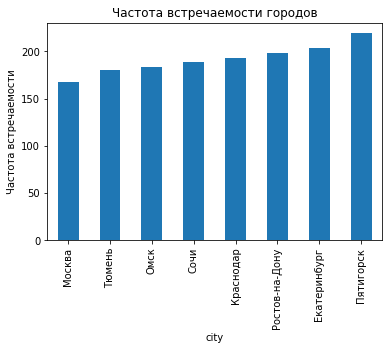

In [15]:
df_users.groupby('city')['user_id'].count().sort_values().plot.bar()
plt.title("Частота встречаемости городов")
plt.ylabel('Частота встречаемости')

Наиболее часто встречаемым городом является Пятигорск, наименее встречаемым - Москва.

- соотношение пользователей с подпиской и без подписки

In [16]:
df_users['subscription_type'].value_counts(normalize=True)

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

<Figure size 720x576 with 0 Axes>

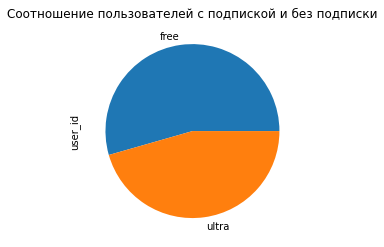

<Figure size 720x576 with 0 Axes>

In [17]:
df_users.groupby('subscription_type')['user_id'].count().plot.pie()
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.figure(figsize=(10, 8))

Преобладает количество пользователей без подписки.

- возраст пользователей

Text(0, 0.5, 'Количество пользователей')

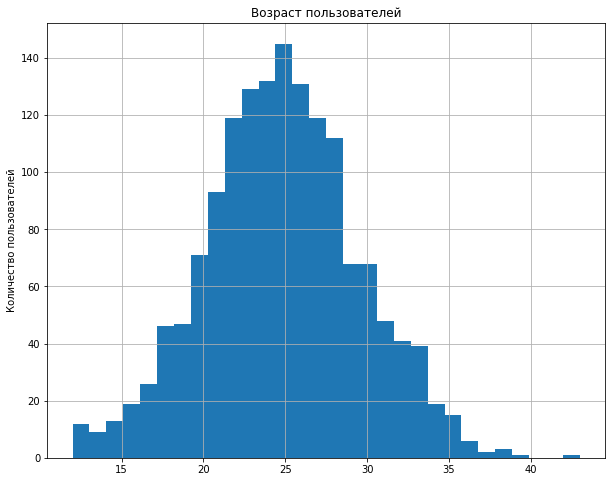

In [18]:
df_users.hist('age', bins=30, figsize=(10, 8))
plt.title('Возраст пользователей')
plt.ylabel('Количество пользователей')

In [19]:
df_users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

In [20]:
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Чаще всего совершают поездки люди в возрасте 25 лет. Услугами сервиса пользуются люди от 12 до 43 лет.

- расстояние, которое пользователь преодолел за одну поездку

Text(0, 0.5, 'Количество пользователей')

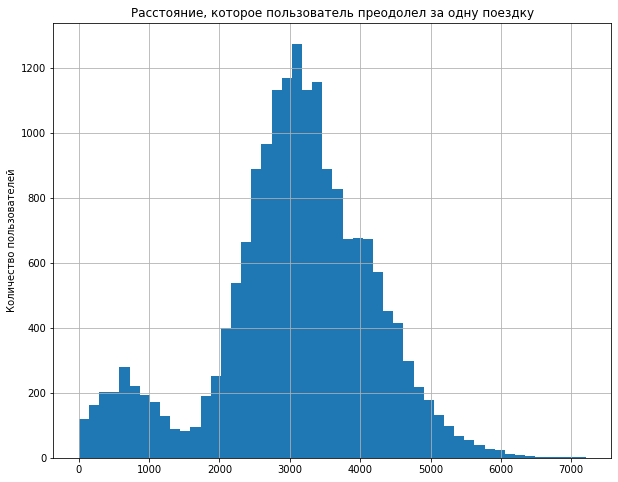

In [21]:
df_rides_go.hist('distance', bins=50, figsize=(10, 8))
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Количество пользователей')


In [22]:
df_rides_go['distance'].sort_values().unique()

array([8.55682926e-01, 2.57078689e+00, 4.32950578e+00, ...,
       6.90849134e+03, 7.06600377e+03, 7.21100774e+03])

На первый взгляд нельзя назвать распрделение нормальным, так как наблюдаются два пика. Также есть сомнения относительно небольших расстояний. Построим "ящик с усами".

<AxesSubplot:>

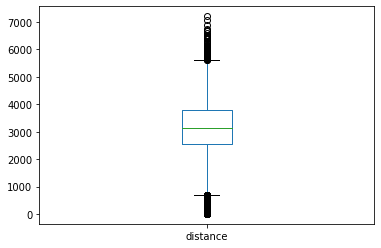

In [23]:
df_rides_go['distance'].plot.box()

Рассмотрим подробнее поездки на расстояния меньше 900 м и обратим внимание на их продолжительность.

In [24]:
df_rides_go.query('distance < 900')[['distance', 'duration']].sort_values('distance')

,distance,duration
11555,0.855683,10.001902
9541,2.570787,3.011018
13690,4.329506,4.008958
8658,6.784447,6.015656
7841,7.097072,10.026614
...,...,...
3198,896.425316,8.068674
935,897.049773,8.832789
12173,897.148133,7.563280
9101,899.137243,12.157929


Время, за которое были преодолены подозрительно небольшие расстояния, вполне им соответствует. 

Такие маленькие дистанции могут быть обусловлены, к примеру, ситуациями, когда "поездка" была начата, но у пользователя возникли какие-то технические проблемы/сомнения, из-за чего она была прервана.

- продолжительность поездок

Text(0, 0.5, 'Количество пользователей')

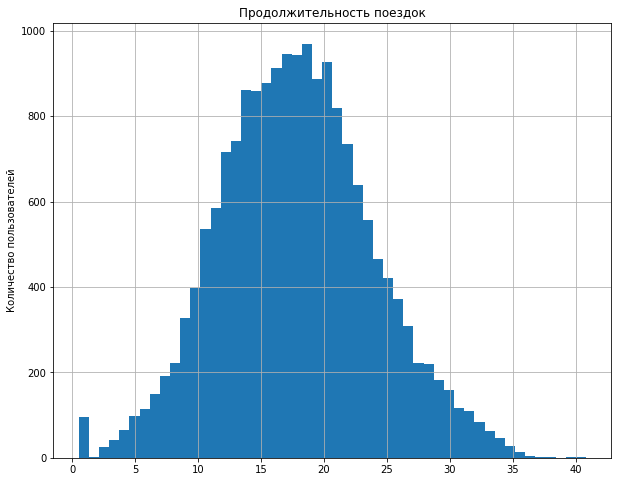

In [25]:
df_rides_go.hist('duration', bins=50, figsize=(10, 8))
plt.title('Продолжительность поездок')
plt.ylabel('Количество пользователей')

Продолжительность поездок распределена нормально. Наиболее частое время использования - 15-20 минут.

## Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [26]:
df = df_rides_go.merge(df_users, on='user_id', how='left')
df

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free


In [27]:
df = df.merge(df_subscriptions_go, on='subscription_type', how='right')
df

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
18064,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
18065,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
18066,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


Создадим ещё два датафрейма из датафрейма df:

- c данными о пользователях без подписки


In [28]:
df_free = df.query('subscription_type == "free"')
df_free.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [29]:
df_free.shape

(11568, 12)

- с данными о пользователях с подпиской

In [30]:
df_ultra = df.query('subscription_type == "ultra"')
df_ultra.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
11568,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
11569,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
11570,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
11571,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
11572,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [31]:
df_ultra.shape

(6500, 12)

Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

- расстояния поездок

Text(0, 0.5, 'Количество поездок')

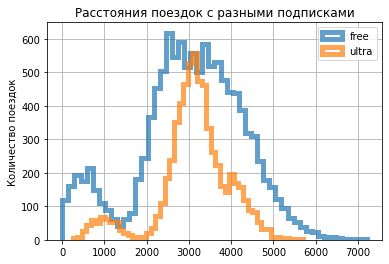

In [32]:
ax = df_free.plot(kind='hist', y='distance', histtype='step', bins=50, linewidth=5, alpha=0.7, label='free')
df_ultra.plot(kind='hist', y='distance', histtype='step', bins=50, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True)
plt.title('Расстояния поездок с разными подписками')
plt.ylabel('Количество поездок')

Обе гистограммы попадают под определение нормального распредления, однако с двумя пиками. По полученным графикам можно сказать, что обладатели подписки наиболее стабильны в своих действиях, а точнее в преодолеваемых расстояниях - среднее расстояние, на которое они передвигаются на самокатах, составляет 3000 метров, чего нельзя сказать о пользователях без подписки - их средние дистанции составляют от 2000 до 4000 метров. Также при рассмотрении пика поменьше становится ясно, что пользователи с подпиской менее склонны к тому, чтобы делать заезды на короткие дистанции, а если мы имеем дело с ними то в среднем они составляют 1000 метров, и не доходят до нулевых расстояний. С пользователями без подписки ситуация обстоит по-другому - среднее (небольшое) расстояние составляет 400 - 600 метров, само преодоленное расстояние в некоторых достигает нулевых и не совсем естественных значений. По итогу можно сделать вывод о том, что поведение пользователей без подписки характеризуется размытостью намерений и целей, в то время как обладатели подписки гораздо более постоянны, с чем и связано оформление подписки.

- продолжительность поездок

Text(0, 0.5, 'Количество поездок')

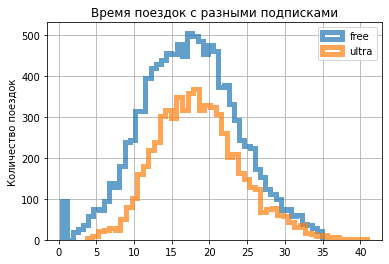

In [33]:
ax = df_free.plot(kind='hist', y='duration', histtype='step', bins=50, linewidth=5, alpha=0.7, label='free')
df_ultra.plot(kind='hist', y='duration', histtype='step', bins=50, linewidth=5, alpha=0.7, label='ultra', ax=ax, grid=True)
plt.title('Время поездок с разными подписками')
plt.ylabel('Количество поездок')

Обе гистограммы характеризуются нормальным распределением, средняя продолжительность поездки - 15-20 минут.

## Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [34]:
# Округлим продолжительность поездки до следующего целого числа
df['duration'] = np.ceil(df['duration'])
df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,15.0,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,17.0,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,21.0,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,10.0,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,18.0,2021-02-14,2,Айдар,22,Омск,free,8,50,0


In [35]:
df_revenue = df.groupby(['user_id', 'month']).agg({'distance': 'sum', 'duration': 'sum', 'date': 'count', 'minute_price' : 'median', 'start_ride_price': 'median', 'subscription_fee': 'median'})
df_revenue = df_revenue.rename(columns={'date': 'count_of_rides'})
df_revenue = df_revenue.reset_index()
df_revenue.head(20)

,user_id,month,distance,duration,count_of_rides,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42.0,2,6,0,199
1,1,4,754.159807,7.0,1,6,0,199
2,1,8,6723.470560,46.0,2,6,0,199
3,1,10,5809.911100,32.0,2,6,0,199
4,1,11,7003.499363,56.0,3,6,0,199
5,1,12,6751.629942,28.0,2,6,0,199
6,2,3,10187.723006,63.0,3,6,0,199
7,2,4,6164.381824,40.0,2,6,0,199
8,2,6,3255.338202,14.0,1,6,0,199
9,2,7,6780.722964,48.0,2,6,0,199


Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 

In [37]:
def revenue_calculation(row):
    return (
    row['count_of_rides'] * row['start_ride_price'] 
    + row['duration'] * row['minute_price'] 
    + row['subscription_fee'] 
)

df_revenue['revenue'] = df_revenue.apply(revenue_calculation, axis=1)
df_revenue

,user_id,month,distance,duration,count_of_rides,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,42.0,2,6,0,199,451.0
1,1,4,754.159807,7.0,1,6,0,199,241.0
2,1,8,6723.470560,46.0,2,6,0,199,475.0
3,1,10,5809.911100,32.0,2,6,0,199,391.0
4,1,11,7003.499363,56.0,3,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,26.0,2,8,50,0,308.0
11327,1534,8,7622.453034,48.0,2,8,50,0,484.0
11328,1534,9,4928.173852,23.0,1,8,50,0,234.0
11329,1534,11,13350.015305,78.0,4,8,50,0,824.0


## Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Необходимо проверить одностороннюю гипотезу о равенстве средних двух генеральных совокупностей. 
- Нулевая гипотеза: средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки.
- Альтернативая гипотеза: средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки.

In [38]:
alpha = 0.05

results = st.ttest_ind(df_ultra['duration'], df_free['duration'], equal_var=False, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')      

p-value: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


In [39]:
df_ultra['duration'].mean() - df_free['duration'].mean()

1.1510758641418413

Отвергаем гипотезу о том, что средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки, в пользу гипотезы о том, что средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки.

2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Необходимо проверить одностороннюю гипотезу.
- Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.
- Альтернативая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров.

In [40]:
alpha = 0.05

optimal_value = 3130

results = st.ttest_1samp(df_ultra['distance'], optimal_value, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')   

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


In [41]:
df_ultra['duration'].mean()

18.54198516280583

Нет оснований отвергнуть нулевую гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Необходимо проверить одностороннюю гипотезу о равенстве средних двух генеральных совокупностей.

- Нулевая гипотеза: помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.
- Альтернативая гипотеза: помесячная выручка от пользователей с подпиской больше выручки от пользователей без подписки.

In [42]:
alpha = 0.05

results = st.ttest_ind(
    df_revenue.loc[df_revenue['subscription_fee'] == 199, 'revenue'], 
    df_revenue.loc[df_revenue['subscription_fee'] == 0, 'revenue'], 
    equal_var=False, 
    alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о том, что помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки, в пользу гипотезы о том, что помесячная выручка от пользователей с подпиской больше выручки от пользователей без подписки.

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Необходимо будет проверить гипотезу о равенстве средних для зависимых выборок. Подразумевается, что данные о количестве обращений до обновления и после него измеряются для одних и тех же объектов, а если быть точнее - для одних и тех же пользователей. Чтобы проверить такую гипотезу, необходимо применить мутод scipy.stats.ttest_rel(). Мы передаем ему два параметра: набор данных (об одних и тех же пользователях) до и после обновления. Размеры выборок одинаковы.

## Вывод

Перед нами стояла задача проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Нам переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. В ходе работы мы провели предобрабтку данных - проверили на наличие пропусков и устранили дубликаты, а таже исследовательский и статистический анализы полученых данных.
По результатам проделанной работы были сделаны следующие выводы:
1. Количество пользователей без подписки немного больше количества пользователй с подпиской.
2. Пользователями сервиса являются люди от 12 до 43 лет. Наболее часто прокатом самокатов пользуются люди в возрасте 25 лет.
3. Обладатели подписки наиболее стабильны в своих действиях, а точнее в преодолеваемых расстояниях - среднее расстояние, на которое они передвигаются на самокатах, составляет 3000 метров, чего нельзя сказать о пользователях без подписки - их средние дистанции составляют от 2000 до 4000 метров. Также пользователи с подпиской менее склонны к тому, чтобы делать заезды на короткие дистанции, а если мы имеем дело с ними то в среднем они составляют 1000 метров, и не доходят до нулевых расстояний. С пользователями без подписки ситуация обстоит по-другому - среднее (небольшое) расстояние составляет 400 - 600 метров, само преодоленное расстояние в некоторых достигает нулевых и не совсем естественных значений. По итогу можно сделать вывод о том, что поведение пользователей без подписки характеризуется размытостью намерений и целей, в то время как обладатели подписки гораздо более постоянны, с чем и связано оформление подписки.
4. Средняя продолжительность поездки - 15-20 минут.

Также были приняты или опровергнуты некоторые гипотезы:
- Отвергаем гипотезу о том, что средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки, в пользу гипотезы о том, что средняя продолжительность поездок пользователей **с подпиской** **больше** средней продолжительности поездок пользователей **без подписки**.
- Не нашлось оснований отвергнуть нулевую гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.
- Отвергаем нулевую гипотезу о том, что помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки, в пользу гипотезы о том, что помесячная выручка от пользователей **с подпиской больше** выручки от пользователей **без подписки**.

Рекомендуется провести различные акции с целью увеличения количества пользователей с подпиской, в связи с тем что:
- во-первых, средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки
- а во-вторых, гипотеза о том, что помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки, была отвергнута в пользу гипотезы о том, что помесячная выручка от пользователей с подпиской больше выручки от пользователей без подписки. И это при условии неравного соотношения пользователей двух категрий (пользователей с подпиской меньше), и если приложить усилия для увеличения количества пользователей с подпиской, то и выручка с этой категории пользователей может возрасти. 
Ко всему прочему, не нашлось оснований отвергнуть нулевую гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров. Значит, пользователи с подпиской оптимально используют самокаты с точки зрения его износа: дольше время службы самоката - меньше затрат на приобртние нового. 